## Clase 9 Feature engineering - Predicción de Adopción de Animales

https://www.kaggle.com/c/petfinder-adoption-prediction/data


**AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)

Age - Age of pet when listed, in months

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Fee - Adoption fee (0 = Free)

In [1]:
 import numpy as np
 import pandas as pd
 from sklearn.linear_model import LinearRegression

### Ejercicio 1

1) Cargar el dataset "train"

2) Trabajar solo con las features "'Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'"

3) Formatear **Age**, **Fee** y **AdoptionSpeed**  como numéricas y el resto como categóricas (pd.Categorical)

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')

In [3]:
df_train = data.filter(items=['Type','Age','Breed1','Breed2','Gender','Health','Fee', 'AdoptionSpeed'])
df_train.head()

,Type,Age,Breed1,Breed2,Gender,Health,Fee,AdoptionSpeed
0,2,3,299,0,1,1,100,2
1,1,4,307,0,2,1,150,2
2,1,1,307,0,1,1,0,2
3,2,3,266,0,2,1,0,2
4,2,12,264,264,1,1,300,1


In [4]:
'''
PONER ADELANTE
df_train['Type'] = pd.Categorical(df_train['Type'])
df_train['Breed1'] = pd.Categorical(df_train['Breed1'])
df_train['Breed2'] = pd.Categorical(df_train['Breed2'])
df_train['Gender'] = pd.Categorical(df_train['Gender'])
df_train['Health'] = pd.Categorical(df_train['Health'])'''

"\nPONER ADELANTE\ndf_train['Type'] = pd.Categorical(df_train['Type'])\ndf_train['Breed1'] = pd.Categorical(df_train['Breed1'])\ndf_train['Breed2'] = pd.Categorical(df_train['Breed2'])\ndf_train['Gender'] = pd.Categorical(df_train['Gender'])\ndf_train['Health'] = pd.Categorical(df_train['Health'])"

### Ejercicio 2
1) Crear una feature nueva para cuando un animal tenga dos **Breeds**. (np.where) 

2) Utilizar one hot encoding para las variables **Gender** y **Health** (pd.get_dummies) y eliminar las variables originales.

3) Elegir un citerio para cuantizar las variables **Age** y **Fee**.

4) Separar la columna **AdoptionSpeed** en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)

5) Utilizar ambos dataset para ajustar una regresión lineal y comparar resultados. A mayor score, mejor el ajuste.

In [5]:
df_train['breed_new'] = np.where(df_train['Breed2']>0,1,0)

In [6]:
#Utilizar one hot encoding para las variables Gender y Health (pd.get_dummies) y eliminar las variables originales.
df_train = pd.get_dummies(df_train,columns=['Gender','Health'])
df_train.head(4)

,Type,Age,Breed1,Breed2,Fee,AdoptionSpeed,breed_new,Gender_1,Gender_2,Gender_3,Health_1,Health_2,Health_3
0,2,3,299,0,100,2,0,1,0,0,1,0,0
1,1,4,307,0,150,2,0,0,1,0,1,0,0
2,1,1,307,0,0,2,0,1,0,0,1,0,0
3,2,3,266,0,0,2,0,0,1,0,1,0,0


In [7]:
# Elegir un citerio para cuantizar las variables Age y Fee.
import seaborn as sns
sns.boxplot(df_train['Age'])

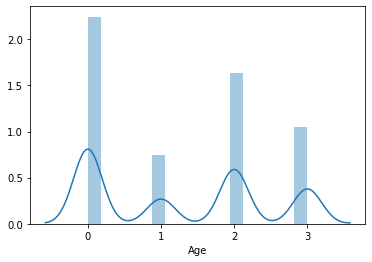

In [8]:
q_cuts = pd.qcut(df_train['Age'], 4, labels=False)

#pd.cut(df_train['Age'], bins=10, labels=False)
sns.distplot(q_cuts)

In [13]:
df_train['Age'] = q_cuts

In [15]:
df_train.tail()

,Type,Age,Breed1,Breed2,Fee,AdoptionSpeed,breed_new,Gender_1,Gender_2,Gender_3,Health_1,Health_2,Health_3
10577,1,1,307,0,0,2,0,1,0,0,1,0,0
10578,1,3,179,307,0,4,1,1,0,0,1,0,0
10579,2,0,266,0,0,2,0,0,0,1,1,0,0
10580,2,2,266,0,0,4,0,0,1,0,1,0,0
10581,1,0,307,307,0,3,1,1,0,0,1,0,0


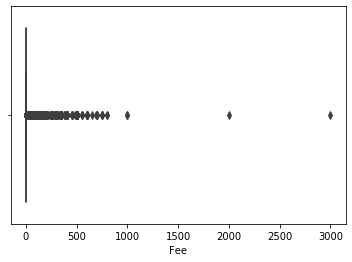

In [16]:
sns.boxplot(df_train['Fee'])

In [48]:
#LOGARÍTMICO
import matplotlib.pyplot as plt
#log_map = np.floor(np.log10(df_train['Fee']))
pd_cut = pd.cut(df_train['Fee'], bins=50, labels=False)
# q_cuts1 = pd.qcut(df_train['Fee'], 4, labels=False)
# Y = df_train['Fee']
# Y_scaled = (Y - Y.min(axis=0)) / (Y.max(axis=0) - Y.min(axis=0))

In [49]:
df_train['Fee'] = pd_cut

In [50]:
df_train.head()

,Type,Age,Breed1,Breed2,Fee,AdoptionSpeed,breed_new,Gender_1,Gender_2,Gender_3,Health_1,Health_2,Health_3
0,2,1,299,0,16,2,0,1,0,0,1,0,0
1,1,2,307,0,33,2,0,0,1,0,1,0,0
2,1,0,307,0,0,2,0,1,0,0,1,0,0
3,2,1,266,0,16,2,0,0,1,0,1,0,0
4,2,2,264,264,33,1,1,1,0,0,1,0,0


In [57]:
# Separar la columna AdoptionSpeed en otro dataframe. (X , y = df.iloc[ : , : ], df.AdoptionSpeed)
X, y = df_train.drop(['AdoptionSpeed'], axis=1), df_train.AdoptionSpeed 

In [58]:
# Utilizar ambos dataset para ajustar una regresión lineal y comparar resultados. A mayor score, mejor el ajuste.
X.columns


Index(['Type', 'Age', 'Breed1', 'Breed2', 'Fee', 'breed_new', 'Gender_1',
       'Gender_2', 'Gender_3', 'Health_1', 'Health_2', 'Health_3'],
      dtype='object')

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [59]:
#Baseline: 0.038
modelo_lr = LinearRegression().fit(X, y)
modelo_lr.score(X,y)

0.10019928335150574